## Data Analysis and Preprocessing

In [30]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Load datasets
creditcard_df = pd.read_csv('../data/creditcard.csv')
fraud_data_df = pd.read_csv('../data/Fraud_Data.csv')
ip_country_df = pd.read_csv('../data/IpAddress_to_Country.csv')

In [32]:
creditcard_df.head()
fraud_data_df.head()
ip_country_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [33]:
fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## Checking for the Missing values

In [34]:
# check for missing values
print("Checking the Missing value for the Creditcard")
print(creditcard_df.isnull().sum())
print("Checking the Missing value for the Fraud_Data")
print(fraud_data_df.isnull().sum())
print("Checking the Missing value for the IP Address of the Country")
print(ip_country_df.isnull().sum())

Checking the Missing value for the Creditcard
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Checking the Missing value for the Fraud_Data
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Checking the Missing value for the IP Address of the Country
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


## Data Cleaning

In [35]:
# Remove duplicates
creditcard_df.drop_duplicates(inplace=True)
fraud_data_df.drop_duplicates(inplace=True)
ip_country_df.drop_duplicates(inplace=True)

In [36]:
# Correct data types for Fraud_Data.csv
fraud_data_df['signup_time'] = pd.to_datetime(fraud_data_df['signup_time'])
fraud_data_df['purchase_time'] = pd.to_datetime(fraud_data_df['purchase_time'])
fraud_data_df['user_id'] = fraud_data_df['user_id'].astype(int)
fraud_data_df['device_id'] = fraud_data_df['device_id'].astype('category')
fraud_data_df['ip_address'] = fraud_data_df['ip_address'].astype(int)
fraud_data_df['purchase_value'] = fraud_data_df['purchase_value'].astype(float)
fraud_data_df['source'] = fraud_data_df['source'].astype('category')
fraud_data_df['browser'] = fraud_data_df['browser'].astype('category')
fraud_data_df['sex'] = fraud_data_df['sex'].astype('category')
fraud_data_df['age'] = fraud_data_df['age'].astype(int)
fraud_data_df['class'] = fraud_data_df['class'].astype(int)

In [37]:
# Correct data types for creditcard.csv
creditcard_df['Amount'] = creditcard_df['Amount'].astype(float)
creditcard_df['Class'] = creditcard_df['Class'].astype(int)

In [38]:
# Check the data types
print(ip_country_df.dtypes)


lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [39]:
# Convert IPs to integers if they are floats
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].astype(int)
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].astype(int)

In [40]:
# Convert IP addresses to integer format
import ipaddress
print(ip_country_df['lower_bound_ip_address'].unique())  # Display unique values
# Remove negative values and any invalid IP addresses
def is_valid_ip(ip_str):
    try:
        # Check if it's a valid IPv4 address
        ipaddress.IPv4Address(ip_str)
        return True
    except (ipaddress.AddressValueError, ValueError):
        return False

# Filter out negative values and invalid IPs
ip_country_df = ip_country_df[ip_country_df['lower_bound_ip_address'].apply(is_valid_ip)]

# Convert valid IP addresses to integers
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['country'] = ip_country_df['country'].astype('category')


[   16777216    16777472    16777728 ...  2113863680  2113929216
 -2147483648]


## EDA

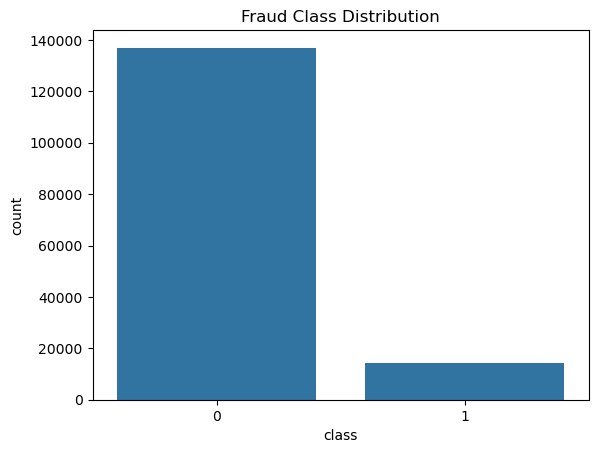

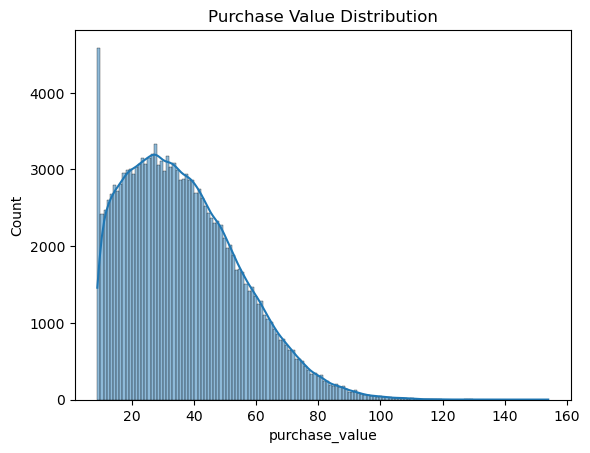

In [41]:
# Univariate analysis for fraud class distribution
sns.countplot(x='class', data=fraud_data_df)
plt.title('Fraud Class Distribution')
plt.show()

# Distribution of purchase value
sns.histplot(fraud_data_df['purchase_value'], kde=True)
plt.title('Purchase Value Distribution')
plt.show()


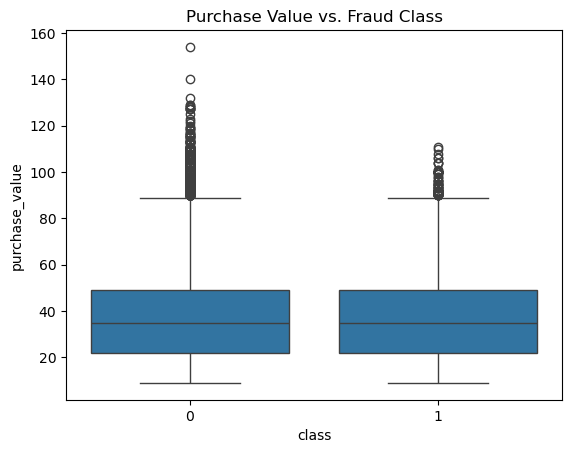

In [42]:
# Bivariate analysis: Purchase value vs. Fraud class
sns.boxplot(x='class', y='purchase_value', data=fraud_data_df)
plt.title('Purchase Value vs. Fraud Class')
plt.show()


## Merge Datasets for Geolocation Analysis

In [43]:
# Convert ip_address to integer format in Fraud_Data.csv
def is_valid_ip(ip_str):
    try:
        # Check if it's a valid IPv4 address
        ipaddress.IPv4Address(ip_str)
        return True
    except (ipaddress.AddressValueError, ValueError):
        return False
fraud_data_df = fraud_data_df[fraud_data_df['ip_address'].apply(is_valid_ip)]

fraud_data_df['ip_address'] = fraud_data_df['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [44]:
import pandas as pd
import ipaddress


# Ensure IP addresses are integers
fraud_data_df['ip_address'] = fraud_data_df['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# Initialize a list to store matching countries
matched_countries = []

# Loop through each row in the fraud_data_df
for index, row in fraud_data_df.iterrows():
    ip = row['ip_address']
    # Check if this IP falls within any of the ranges in ip_country_df
    matched_country = ip_country_df[(ip_country_df['lower_bound_ip_address'] <= ip) & 
                                     (ip_country_df['upper_bound_ip_address'] >= ip)]
    
    if not matched_country.empty:
        # If there are matches, get the first one (or handle multiple matches as needed)
        matched_countries.append(matched_country['country'].values[0])
    else:
        matched_countries.append(None)  # Append None if no match is found

# Add the matched countries back to the fraud_data_df
fraud_data_df['country'] = matched_countries


In [45]:
# Display the first few rows of the merged DataFrame
print(fraud_data_df.head())

# Display specific columns of interest
print(fraud_data_df[['user_id', 'ip_address', 'country']].head())

# Check for rows where the country is missing
missing_country_df = fraud_data_df[fraud_data_df['country'].isnull()]
print("Rows with missing countries:")
print(missing_country_df)


# Get the number of rows in the DataFrame
print("Number of rows in the merged DataFrame:", len(fraud_data_df))

# Save the merged DataFrame to a CSV file
fraud_data_df.to_csv('merged_fraud_data.csv', index=False)


   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11            34.0   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54            16.0   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53            39.0   
7   360585 2015-04-06 07:35:45 2015-05-25 17:21:14            27.0   
9   182338 2015-01-25 17:49:49 2015-03-23 23:05:42            62.0   

       device_id source browser sex  age  ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0  United States  
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0  United States  
7  HPUCUYLMJBYFW    Ads   Opera   M   34  1692458727      0  United States  
9  NRFFPPHZYFUVC    Ads      IE   M   31   341674739      0  United States  
   user_id  ip_address        country
0    22058   732758368          Japan
1   333320   350311387  United States
4  

In [46]:
# Get the number of rows in the DataFrame
print(len(fraud_data_df))

75300


In [47]:
fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27.0,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62.0,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States


## Feature Engineering

In [48]:
# Load the merged data
merged_fraud_data_df = pd.read_csv('merged_fraud_data.csv')

In [49]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
3,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27.0,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States
4,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62.0,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States


In [50]:
print(merged_fraud_data_df.isnull().sum())

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age                  0
ip_address           0
class                0
country           2264
dtype: int64


In [51]:
merged_fraud_data_df['country'].fillna('Unknown', inplace=True)

C:\Users\King Betse\AppData\Local\Temp\ipykernel_24368\4168824805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_fraud_data_df['country'].fillna('Unknown', inplace=True)


In [52]:
print(merged_fraud_data_df.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
country           0
dtype: int64


In [53]:
# Frequency of transactions per user
transaction_frequency = merged_fraud_data_df['user_id'].value_counts().reset_index()
transaction_frequency.columns = ['user_id', 'transaction_frequency']

# Merge this back to the main dataframe
merged_fraud_data_df = merged_fraud_data_df.merge(transaction_frequency, on='user_id', how='left')

# Velocity can be defined as total purchase value divided by the number of transactions
velocity = merged_fraud_data_df.groupby('user_id')['purchase_value'].sum() / merged_fraud_data_df.groupby('user_id')['purchase_value'].count()
merged_fraud_data_df['velocity'] = merged_fraud_data_df['user_id'].map(velocity)


In [54]:
# Convert purchase_time to datetime
merged_fraud_data_df['purchase_time'] = pd.to_datetime(merged_fraud_data_df['purchase_time'])

# Extract hour and day
merged_fraud_data_df['hour_of_day'] = merged_fraud_data_df['purchase_time'].dt.hour
merged_fraud_data_df['day_of_week'] = merged_fraud_data_df['purchase_time'].dt.dayofweek  # 0=Monday, 6=Sunday


In [55]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,34.0,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,16.0,1,0
2,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,39.0,18,2
3,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27.0,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States,1,27.0,17,0
4,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62.0,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States,1,62.0,23,0


In [56]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,34.0,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,16.0,1,0
2,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,39.0,18,2
3,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27.0,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States,1,27.0,17,0
4,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62.0,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States,1,62.0,23,0


In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# # Load your merged dataset
# merged_fraud_data_df = pd.read_csv('merged_fraud_data.csv')

# Check for missing values in the relevant numerical columns
print(merged_fraud_data_df[['purchase_value', 'age', 'transaction_frequency', 'velocity', 'hour_of_day', 'day_of_week']].isnull().sum())

# Assuming you want to drop rows with NaN in the columns to scale
# merged_fraud_data_df.dropna(subset=['purchase_value', 'age', 'transaction_frequency', 'velocity', 'hour_of_day', 'day_of_week'], inplace=True)

# Select the numerical columns to scale
numerical_columns = ['purchase_value', 'age', 'transaction_frequency', 'velocity', 'hour_of_day', 'day_of_week']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
merged_fraud_data_df[numerical_columns] = scaler.fit_transform(merged_fraud_data_df[numerical_columns])

# Check the scaled data
merged_fraud_data_df[numerical_columns].head()

# Save the scaled DataFrame if needed
# merged_fraud_data_df.to_csv('scaled_merged_fraud_data.csv', index=False)


purchase_value           0
age                      0
transaction_frequency    0
velocity                 0
hour_of_day              0
day_of_week              0
dtype: int64


,purchase_value,age,transaction_frequency,velocity,hour_of_day,day_of_week
0,-0.161856,0.679771,0.0,-0.161856,-1.375195,0.985272
1,-1.139968,2.298208,0.0,-1.139968,-1.519970,-1.506833
2,0.109842,1.373387,0.0,0.109842,0.941217,-0.509991
3,-0.542233,0.101758,0.0,-0.542233,0.796442,-1.506833
4,1.359651,-0.245050,0.0,1.359651,1.665096,-1.506833


hour_of_day
-1.664746    0.091026
-1.519970    0.098551
-1.375195    0.097553
-1.230419    0.099819
-1.085643    0.085553
-0.940867    0.073681
-0.796092    0.103993
-0.651316    0.092777
-0.506540    0.098929
-0.361764    0.105784
-0.216989    0.115308
-0.072213    0.083756
 0.072563    0.105736
 0.217339    0.093137
 0.362114    0.091778
 0.506890    0.105709
 0.651666    0.084724
 0.796442    0.114197
 0.941217    0.088331
 1.085993    0.094231
 1.230769    0.073730
 1.375544    0.108320
 1.520320    0.083436
 1.665096    0.067130
Name: class, dtype: float64


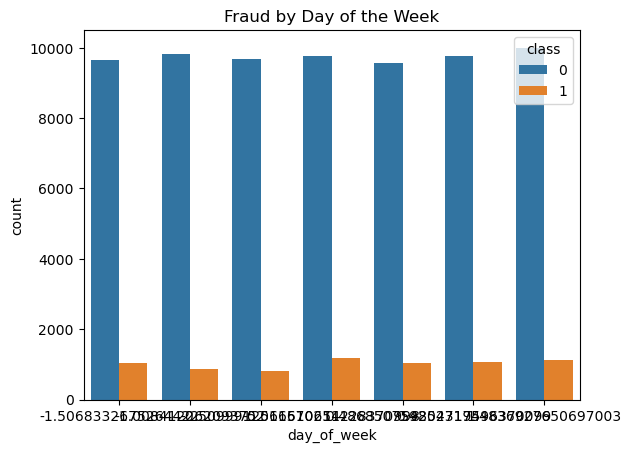

In [58]:
# Example: Group transactions by hour_of_day for analysis
hourly_fraud = merged_fraud_data_df.groupby('hour_of_day')['class'].mean()
print(hourly_fraud)

# Example: Visualize fraud occurrences by day of the week
sns.countplot(x='day_of_week', hue='class', data=merged_fraud_data_df)
plt.title('Fraud by Day of the Week')
plt.show()


In [59]:
merged_fraud_data_df[numerical_columns].head()

,purchase_value,age,transaction_frequency,velocity,hour_of_day,day_of_week
0,-0.161856,0.679771,0.0,-0.161856,-1.375195,0.985272
1,-1.139968,2.298208,0.0,-1.139968,-1.519970,-1.506833
2,0.109842,1.373387,0.0,0.109842,0.941217,-0.509991
3,-0.542233,0.101758,0.0,-0.542233,0.796442,-1.506833
4,1.359651,-0.245050,0.0,1.359651,1.665096,-1.506833


In [60]:
merged_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.161856,QVPSPJUOCKZAR,SEO,Chrome,M,0.679771,732758368,0,Japan,0.0,-0.161856,-1.375195,0.985272
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.139968,EOGFQPIZPYXFZ,Ads,Chrome,F,2.298208,350311387,0,United States,0.0,-1.139968,-1.519970,-1.506833
2,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.109842,NAUITBZFJKHWW,Ads,Safari,M,1.373387,415583117,0,United States,0.0,0.109842,0.941217,-0.509991
3,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,-0.542233,HPUCUYLMJBYFW,Ads,Opera,M,0.101758,1692458727,0,United States,0.0,-0.542233,0.796442,-1.506833
4,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,1.359651,NRFFPPHZYFUVC,Ads,IE,M,-0.245050,341674739,0,United States,0.0,1.359651,1.665096,-1.506833


In [61]:
# One-hot encoding for categorical features
merged_fraud_data_df = pd.get_dummies(merged_fraud_data_df, columns=['sex', 'source','country', 'browser'], drop_first=True)


In [62]:
merged_fraud_data_df.to_csv('encoded_fraud_data.csv', index=False)